In [1]:
import seaborn as sns
%matplotlib inline

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


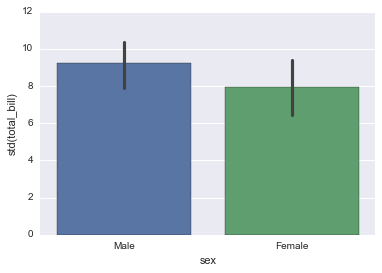

In [5]:
# the most basic plot for categorical data: bar plot.
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std)

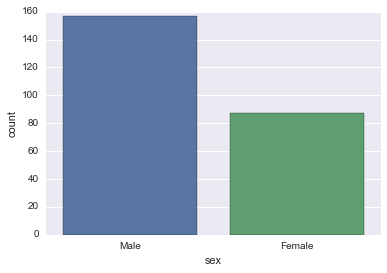

In [6]:
# count plot, the estimator is explicitly the count
sns.countplot(x = 'sex', data = tips)

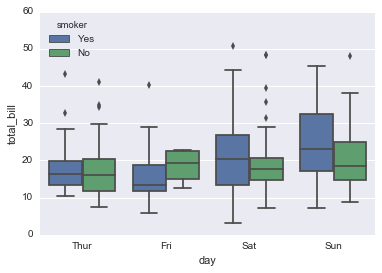

In [8]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')
# group boxplot
# hue indicator, get to the whole other layer of data.

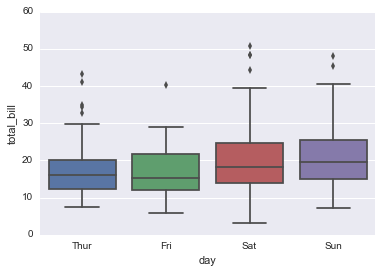

In [10]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips)

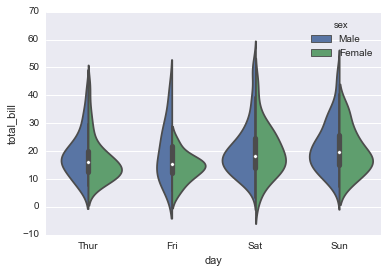

In [12]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)
# hard to read/interpret
# cost a little more time to see
# shows a little more information of the actual data distribution!

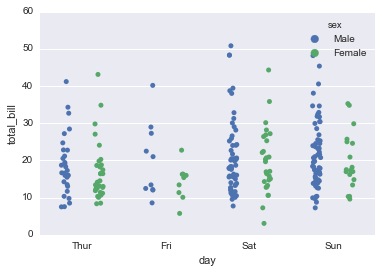

In [16]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True,
              hue = 'sex', split = True)
# a bunch of points stacked on each other, hard to tell the true density of the points.

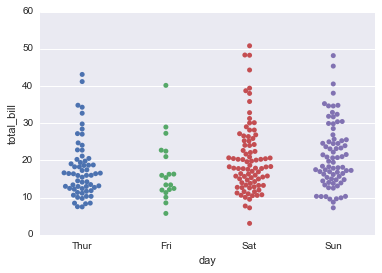

In [17]:
# combine the violine plot and strip plot: swarmplot
sns.swarmplot(x = 'day', y = 'total_bill', data = tips)
# not scalable... since the points are not stacked on top of each other.
# combine violine and swarmplot?

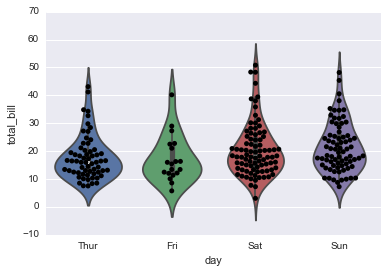

In [19]:
# combine violine and swarmplot?
sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')

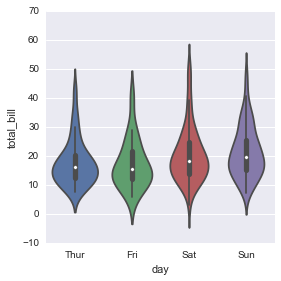

In [21]:
# factor plot? the most general form of the plots
# use kind to pick the specific type
sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'violin')

# Matrix

In [22]:
flights = sns.load_dataset('flights')

In [23]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [24]:
# the rows should also be a variable for the matrix!

In [26]:
tc = tips.corr() #<----- matrix form!

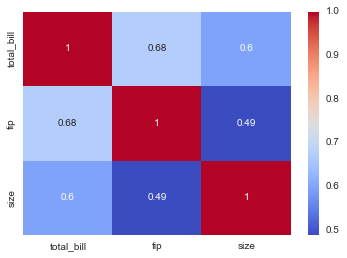

In [29]:
sns.heatmap(tc, annot = True, cmap = 'coolwarm')
# annotation, shows the actual numbers for each cell, along with the color!

In [31]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')

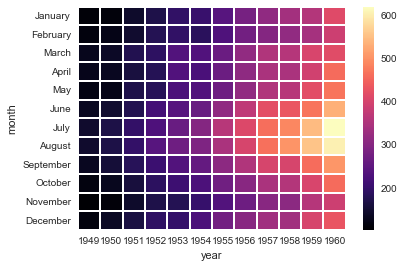

In [34]:
sns.heatmap(fp, cmap = 'magma', linecolor = 'white', linewidth = 1)
# can do a lot of customization~

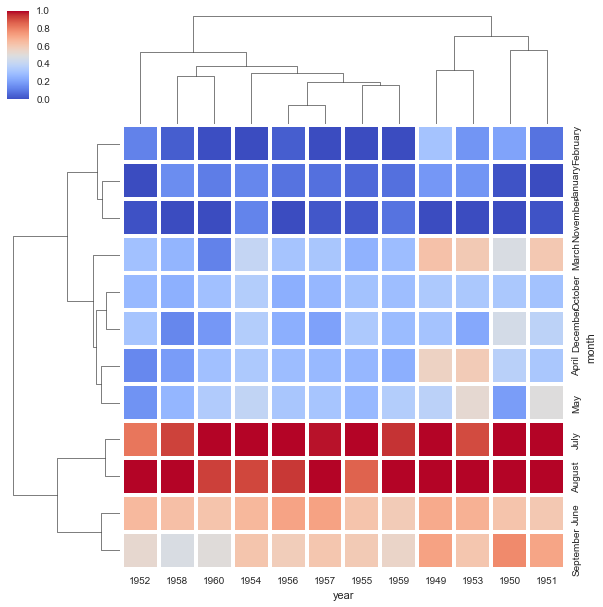

In [39]:
# clustered version of the heatmap~
sns.clustermap(fp, linewidth = 3, linecolor = 'white',
               standard_scale = True, cmap = 'coolwarm')
# cluster rows and columns based on their similarity.
# standardize the scale


# Regression Plots

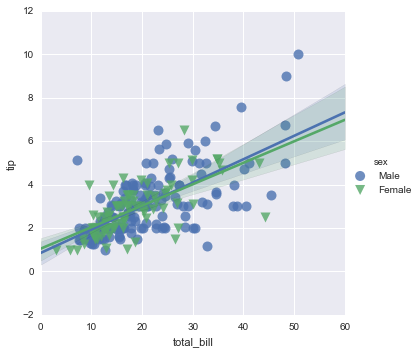

In [42]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex',
          markers = ['o', 'v'], scatter_kws = {'s': 100})
# the scatter_kws is based on matplotlib, use the argument with a dictionary...
# advanced skills!

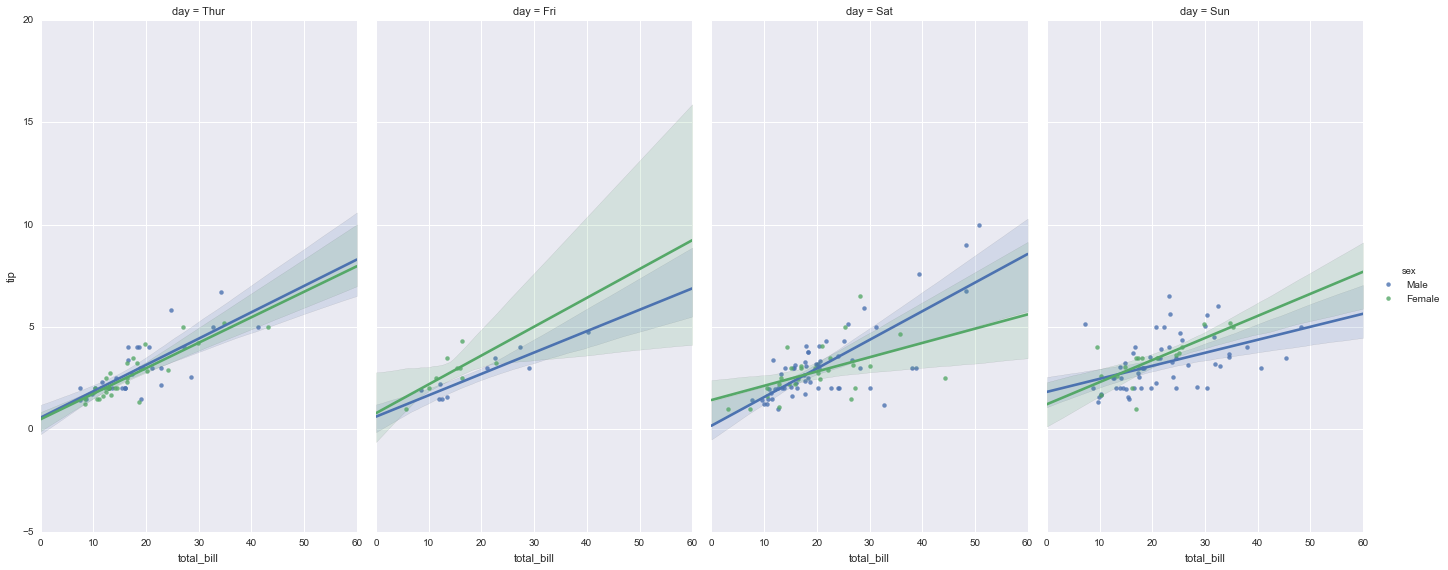

In [48]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips,
           col = 'day', hue = 'sex', aspect = 0.6, size = 8)

In [49]:
iris = sns.load_dataset('iris')

In [50]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

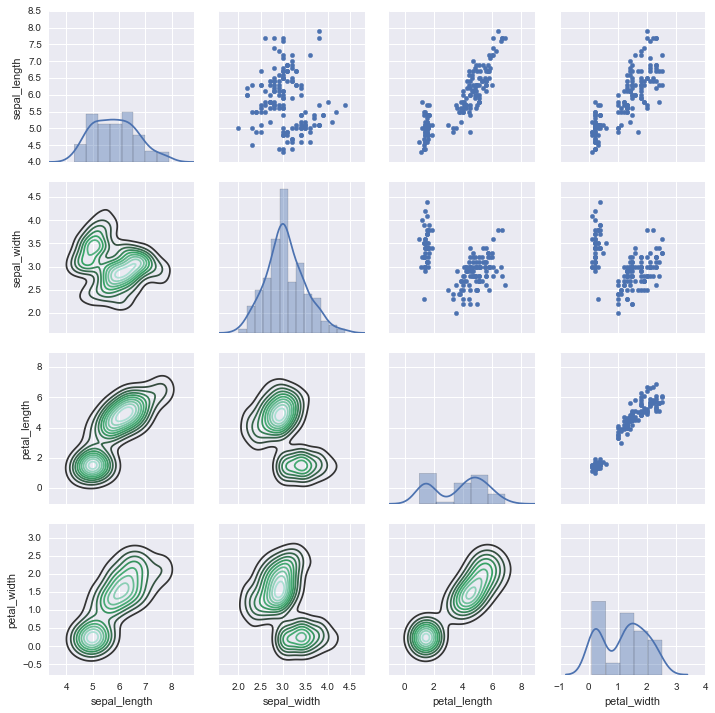

In [60]:
g = sns.PairGrid(iris) # <-- build it from scratch
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

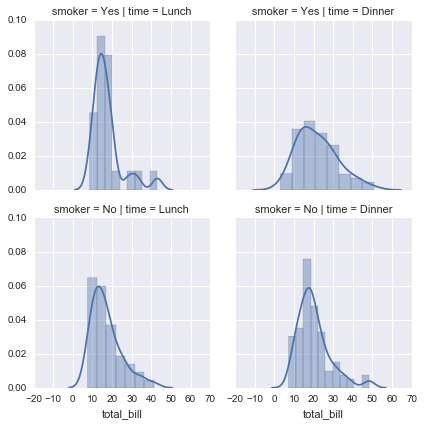

In [64]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(sns.distplot, 'total_bill') #<-- plot a col, separating by the two other cols


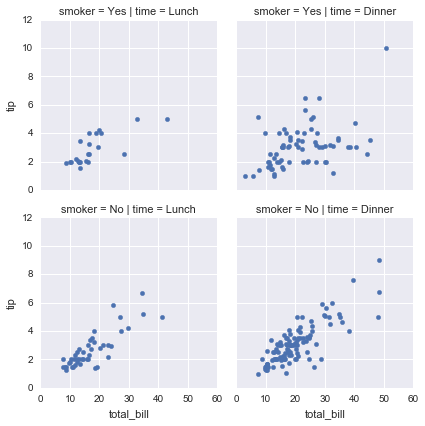

In [68]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(plt.scatter, 'total_bill', 'tip') #<-- plot a col, separating by the two other cols


# Style and Color

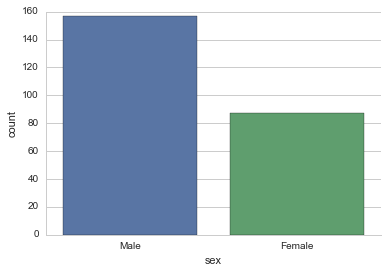

In [74]:
sns.set_style('whitegrid') # <-- set the style for the following plots
sns.countplot(x = 'sex', data = tips)
sns.despine() #<- can customize all 4 spines

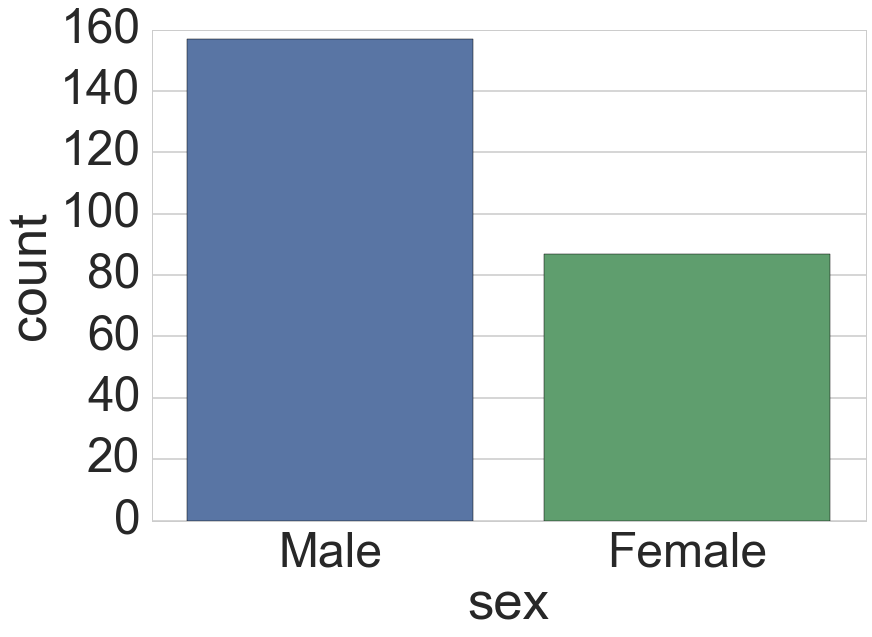

In [76]:
sns.set_context(context = 'poster', font_scale = 3) # <-- modify for different occations
sns.countplot(x = 'sex', data = tips)

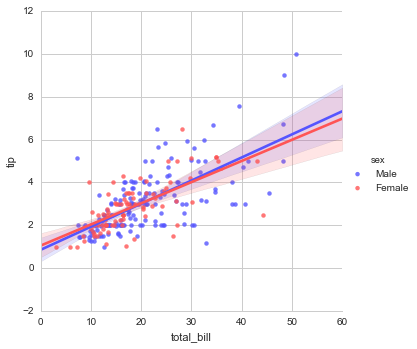

In [81]:
sns.set_context(context = 'notebook')
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'seismic')
# go to google, search for "matplotlib color map", choose the name you want